In [ ]:
import torch
import numpy as np
import sys
sys.path.append("../../src")
from dimchanger import DimChanger
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd

In [1]:
data_name = 'adata_emt'
savepath = f'../../results/{data_name}/'
datapath = f'../../data/{data_name}'

adata = sc.read_h5ad(f'../../data/{data_name}_meld.h5ad')
# adata.obs['dpt_bin'] = pd.cut(adata.obs['meld_likelihood'], bins=4, labels=False)

gene_names = adata.var_names

# data = np.load(f'{datapath}_gaga.npz')
traj = np.load(f'{savepath}/mioflow_results/trajectories_phate.npy')


NameError: name 'sc' is not defined

In [ ]:
dimchanger = DimChanger.load('../../dimchanger')

In [ ]:
X_pca = np.load('../../data_main/X_pca.npy')
X_phate = np.load('../../data_main/X_phate.npy')
X_phate_vis = np.load('../../data_main/X_phate_vis.npy')

In [ ]:
traj_shapes = traj.shape
traj_flat = traj.reshape(-1, traj.shape[-1])
traj_pca = dimchanger.phate2pca(traj_flat)
traj_vis = dimchanger.phate2vis(traj_flat)
traj_pca = traj_pca.reshape(traj_shapes[0], traj_shapes[1], -1)
traj_vis = traj_vis.reshape(traj_shapes[0], traj_shapes[1], -1)

In [ ]:
traj_pca.shape

(100, 100, 50)

Text(0.5, 1.0, 'Decoded trajectories in PCA space')

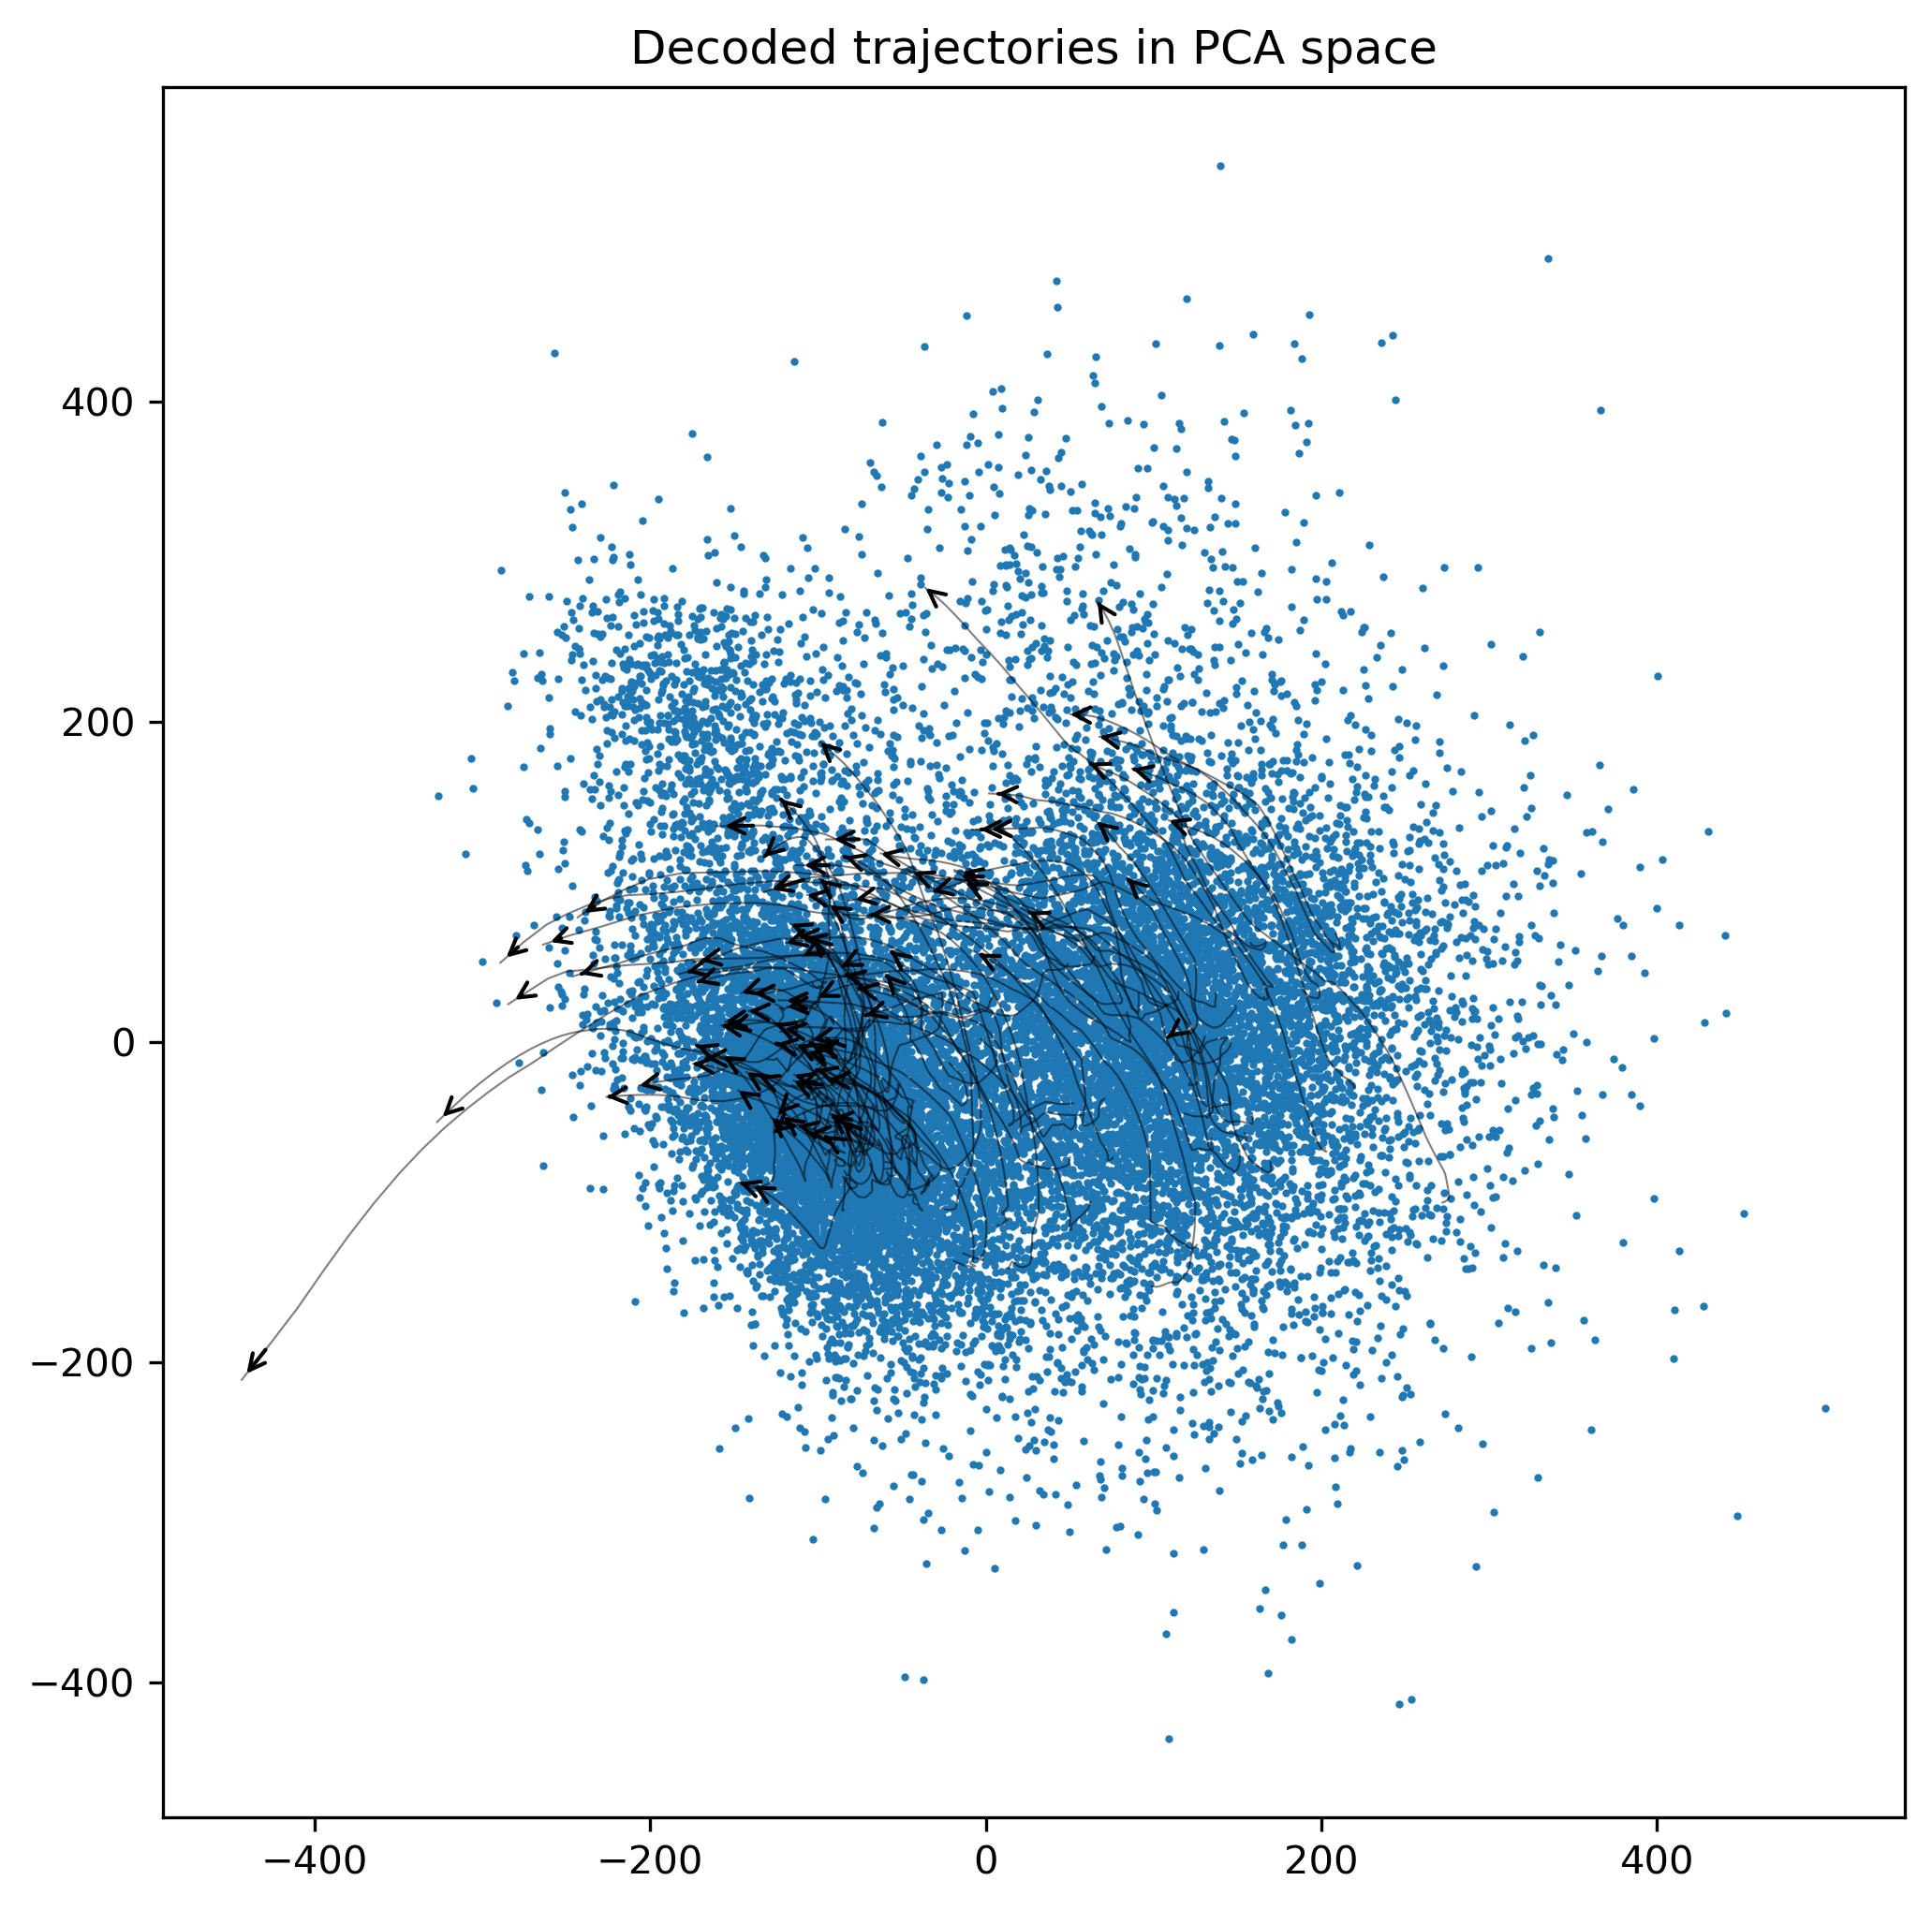

In [ ]:
fig = plt.figure(figsize=(8, 8), dpi=300)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1)
# subsample_ids = np.random.choice(np.arange(traj_pca.shape[0]), size=10, replace=False)
for i,traji in enumerate(np.transpose(traj_pca, axes=(1,0,2))):
    plt.plot(traji[:, 0], traji[:, 1], alpha=.5, linewidth=.5, c='Black');
    plt.annotate('', xy=(traji[-1, 0], traji[-1, 1]), xytext=(traji[-2, 0], traji[-2, 1]),
                 arrowprops=dict(arrowstyle='->', color='Black', lw=1, mutation_scale=10))
plt.title("Decoded trajectories in PCA space")


/tmp/ipykernel_3943302/991043374.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_phate_vis[:, 0], X_phate_vis[:, 1], cmap='viridis', s=1)


Text(0.5, 1.0, 'Mapped trajectories in 2D PHATE space')

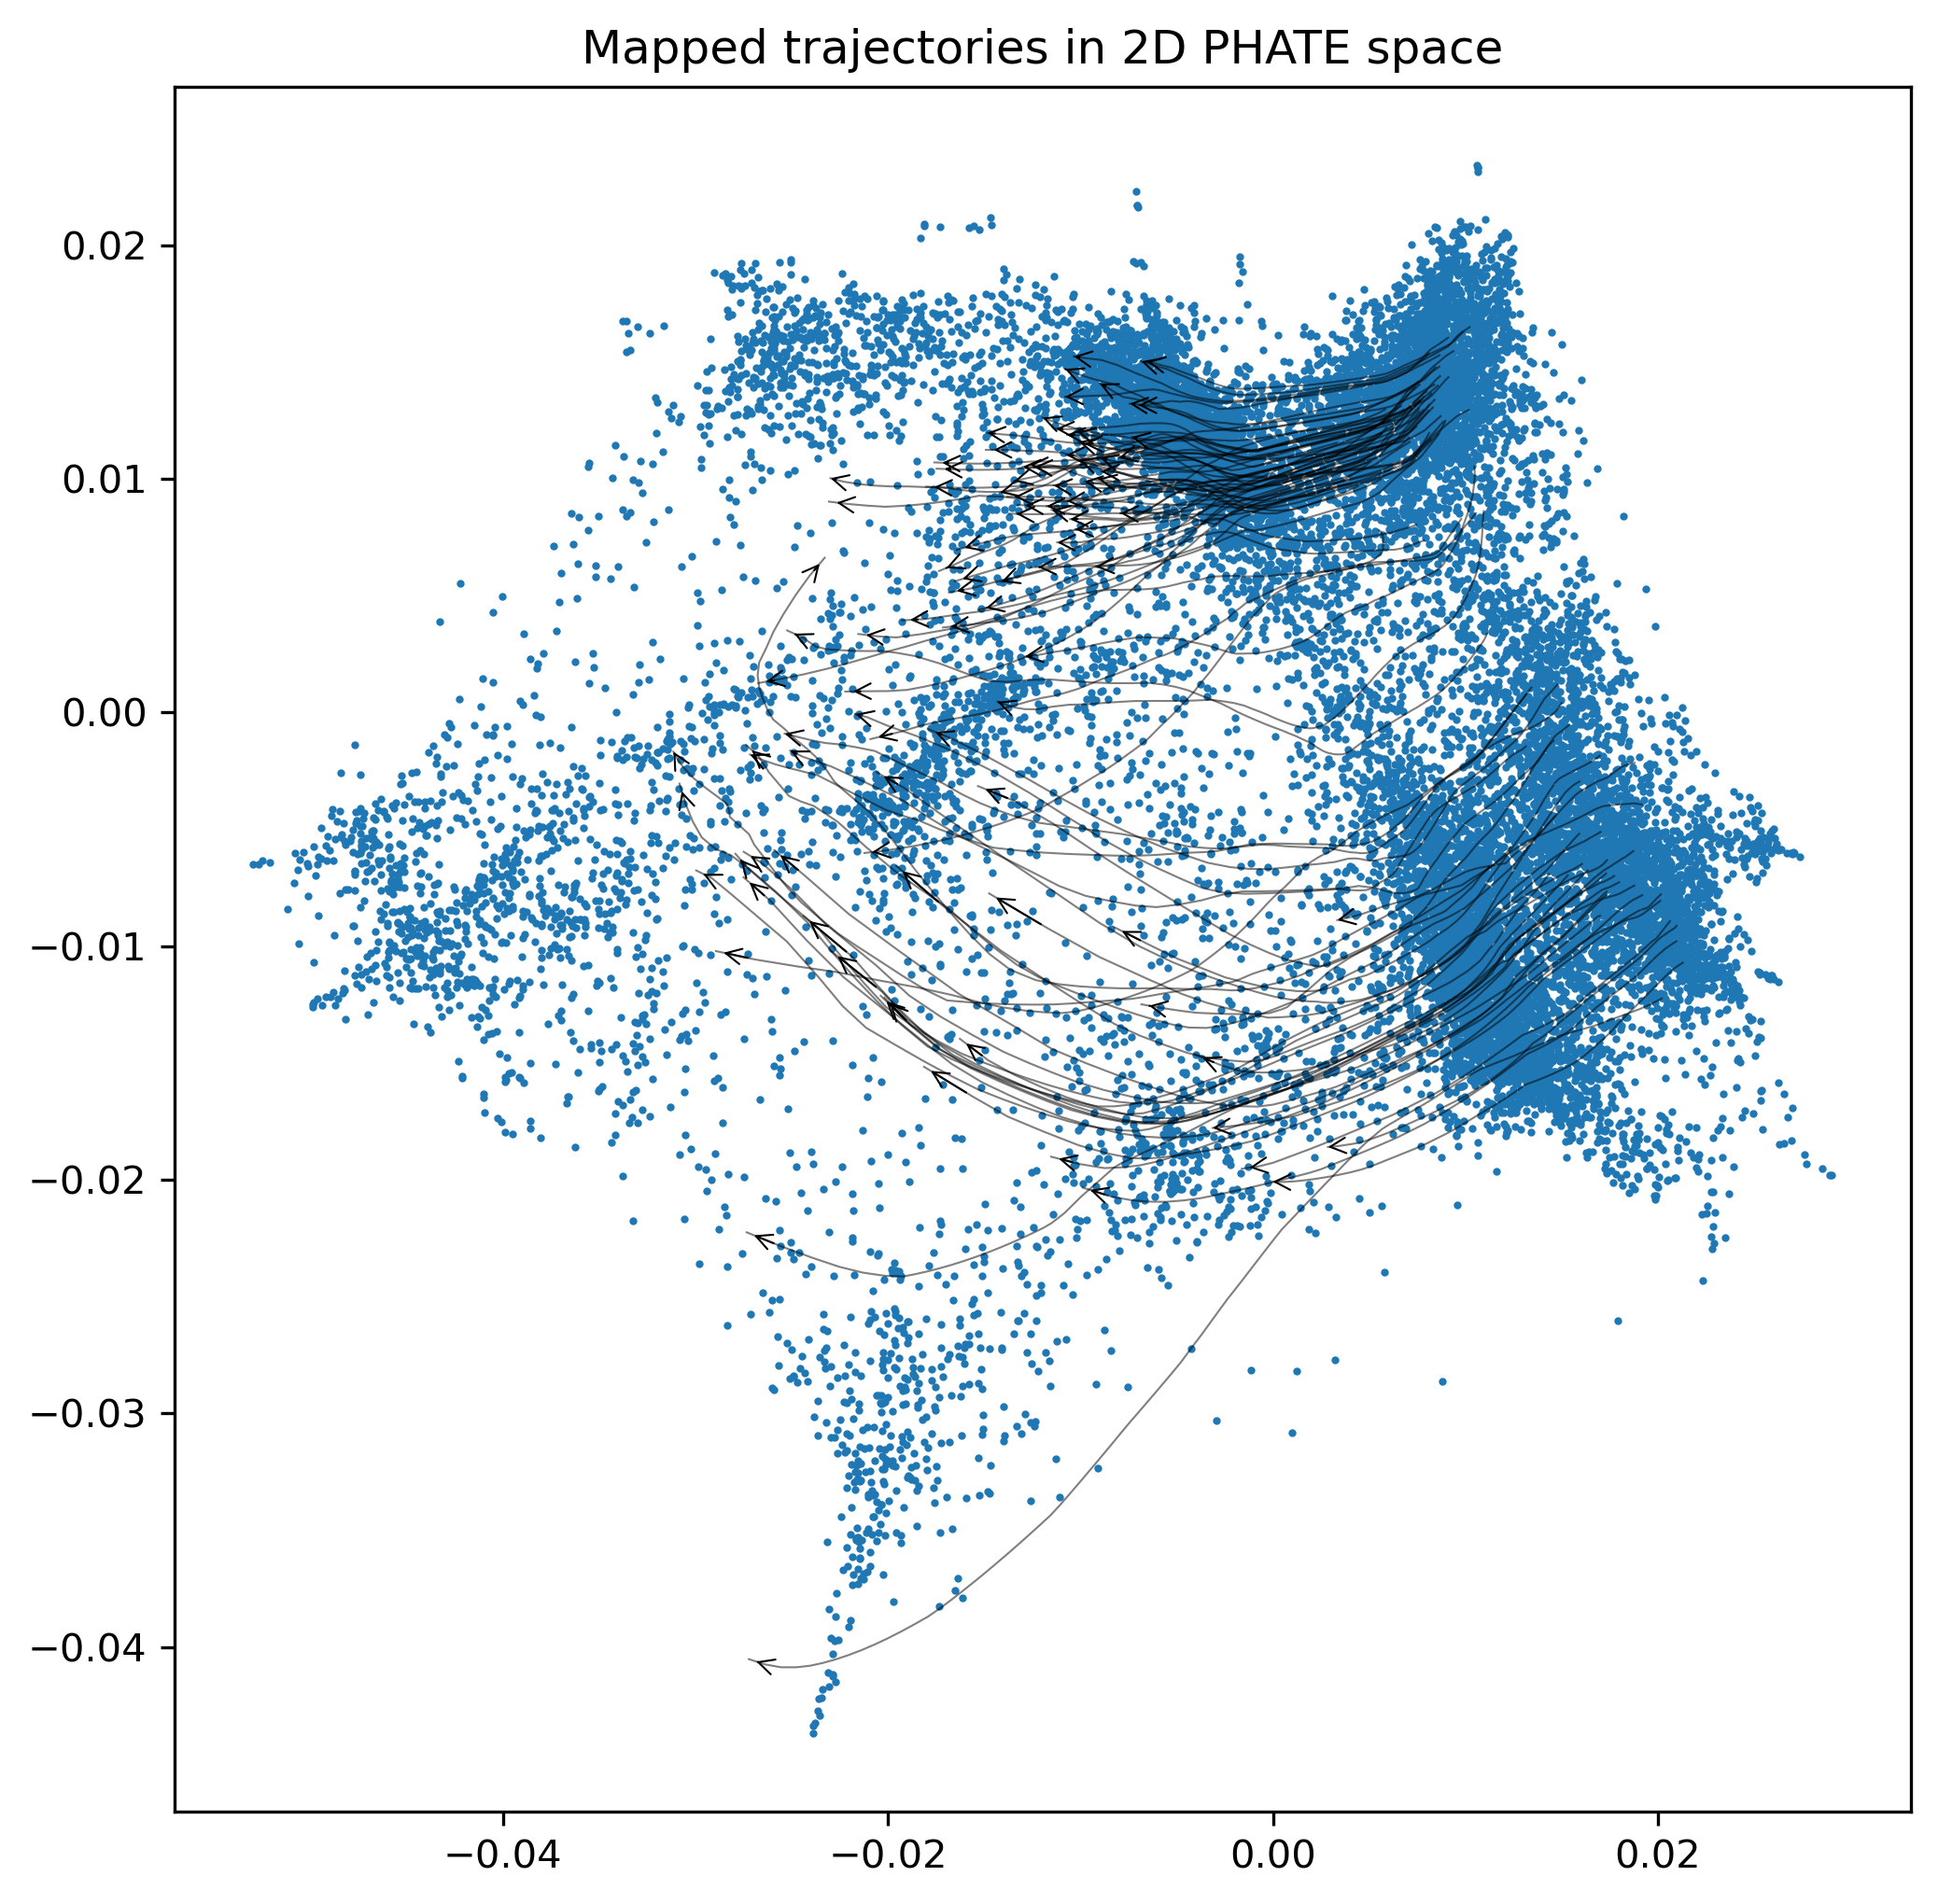

In [ ]:
fig = plt.figure(figsize=(8, 8), dpi=300)
plt.scatter(X_phate_vis[:, 0], X_phate_vis[:, 1], cmap='viridis', s=1)
for i,traji in enumerate(np.transpose(traj_vis, axes=(1,0,2))):
# for i,traj in enumerate(trajvis):
    plt.plot(traji[:, 0], traji[:, 1], alpha=.5, linewidth=.5, color='Black');
    plt.annotate('', xy=(traji[-1, 0], traji[-1, 1]), xytext=(traji[-2, 0], traji[-2, 1]),
                 arrowprops=dict(arrowstyle='->', color='Black', lw=.5, mutation_scale=10))
plt.title("Mapped trajectories in 2D PHATE space")
# plt.scatter(trajendvis[:, 0], trajendvis[:, 1], c='Red', s=10)
# plt.scatter(trajend[:, 0], trajend[:, 1], c='Blue', s=10)
# plt.plot(unatraj[:, 0], unatraj[:, 1], c='Green', linewidth=1)
# plt.plot(unatrajvis[:, 0], unatrajvis[:, 1], c='Orange', linewidth=1)

In [ ]:
traj_dec_np = traj_pca.reshape(-1, traj_pca.shape[-1])
X_recon = (traj_dec_np @ adata.varm['PCs'].T) + adata.X.mean(axis=0)
traj_gene_sp = X_recon.reshape(traj.shape[0], traj.shape[1], -1)

In [ ]:
np.save('../../results/adata_emt/mioflow_results/traj_gene_sp.npy', traj_gene_sp)

In [ ]:
adata.var_names

Index(['CellBody_Intensity_UpperQuartileIntensity_Cycle01_CyclinB1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle01_DAPI',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle01_Ecadherin',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle01_p16INK2a',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle02_EpCAM',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle02_TJP1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle02_ZEB1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle03_CyclinA1A2',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle03_cMyc',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle03_pSMAD23',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle04_CyclinE1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle04_NCADHERIN',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle04_TWIST',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle05_CD44',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle05

In [ ]:
traj_gene_sp.shape

(100, 100, 60)

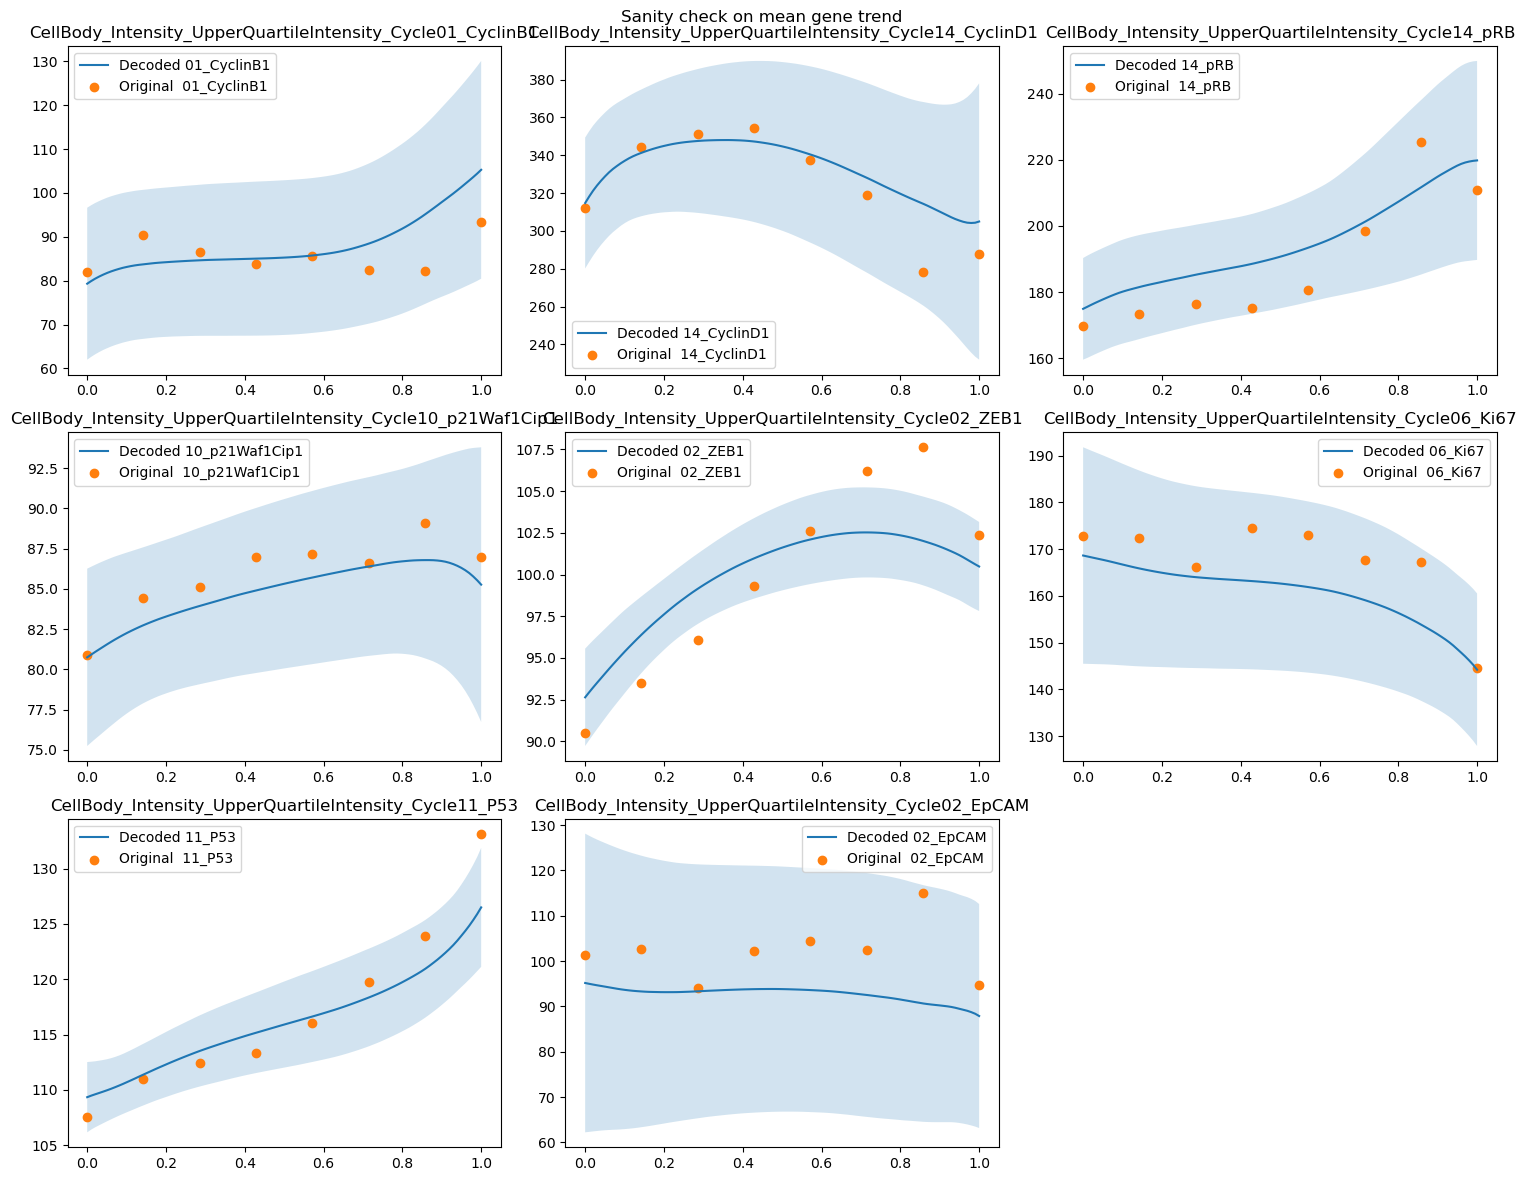

In [ ]:
# sanity check
gene_markers = [
    'CellBody_Intensity_UpperQuartileIntensity_Cycle01_CyclinB1',
    'CellBody_Intensity_UpperQuartileIntensity_Cycle14_CyclinD1',
    'CellBody_Intensity_UpperQuartileIntensity_Cycle14_pRB',
    'CellBody_Intensity_UpperQuartileIntensity_Cycle10_p21Waf1Cip1',
    'CellBody_Intensity_UpperQuartileIntensity_Cycle02_ZEB1',
    'CellBody_Intensity_UpperQuartileIntensity_Cycle06_Ki67',
    'CellBody_Intensity_UpperQuartileIntensity_Cycle11_P53',
    'CellBody_Intensity_UpperQuartileIntensity_Cycle02_EpCAM'
]

example_gene = gene_markers


# sc.pp.highly_variable_genes(adata, n_top_genes=25)
# example_gene = adata.var_names[adata.var['highly_variable']]



example_gene = [g for g in example_gene if g in adata.var_names]
example_gene_mask = adata.var_names.isin(example_gene)
adata_example_gene = adata[:, example_gene_mask]
decoded_example_gene = traj_gene_sp[:, :, example_gene_mask]
decoded_example_gene_mean = decoded_example_gene.mean(axis=1)
decoded_example_gene_std = decoded_example_gene.std(axis=1)
x_time = np.linspace(0, 1, traj.shape[1])
x_time_data = adata_example_gene.obs['dpt_bin']
x_time_data = (x_time_data - x_time_data.min()) / (x_time_data.max() - x_time_data.min())

data_df = pd.DataFrame(adata_example_gene.X.toarray(), columns=example_gene, index=adata_example_gene.obs_names)
data_df['x_time'] = x_time_data

data_mean = data_df.groupby('x_time').mean()
data_std = data_df.groupby('x_time').std()

n_genes = decoded_example_gene_mean.shape[1]
n_rows = int(np.ceil(np.sqrt(n_genes)))
n_cols = int(np.ceil(n_genes / n_rows))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i in range(n_genes):
    ax = axes[i]
    ax.plot(x_time, decoded_example_gene_mean[:,i], label=f'Decoded {example_gene[i].split("_Cycle")[-1]}')
    ax.fill_between(x_time, decoded_example_gene_mean[:,i] - decoded_example_gene_std[:,i], decoded_example_gene_mean[:,i] + decoded_example_gene_std[:,i], alpha=0.2)
    ax.scatter(data_mean.index, data_mean[example_gene[i]], label=f'Original  {example_gene[i].split("_Cycle")[-1]}')
    # ax.fill_between(data_mean.index, data_mean[example_gene[i]] - data_std[example_gene[i]], data_mean[example_gene[i]] + data_std[example_gene[i]], alpha=0.2)
    ax.legend()
    ax.set_title(example_gene[i])
    
# Hide empty subplots
for i in range(n_genes, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
# Add suptitle with padding
plt.subplots_adjust(top=0.95)  # Leave space at top
plt.suptitle('Sanity check on mean gene trend', y=0.98)  # Position suptitle in the space

plt.show()

In [ ]:
X_pca_dec_back = (X_pca @ adata.varm['PCs'].T) + adata.X.mean(axis=0)

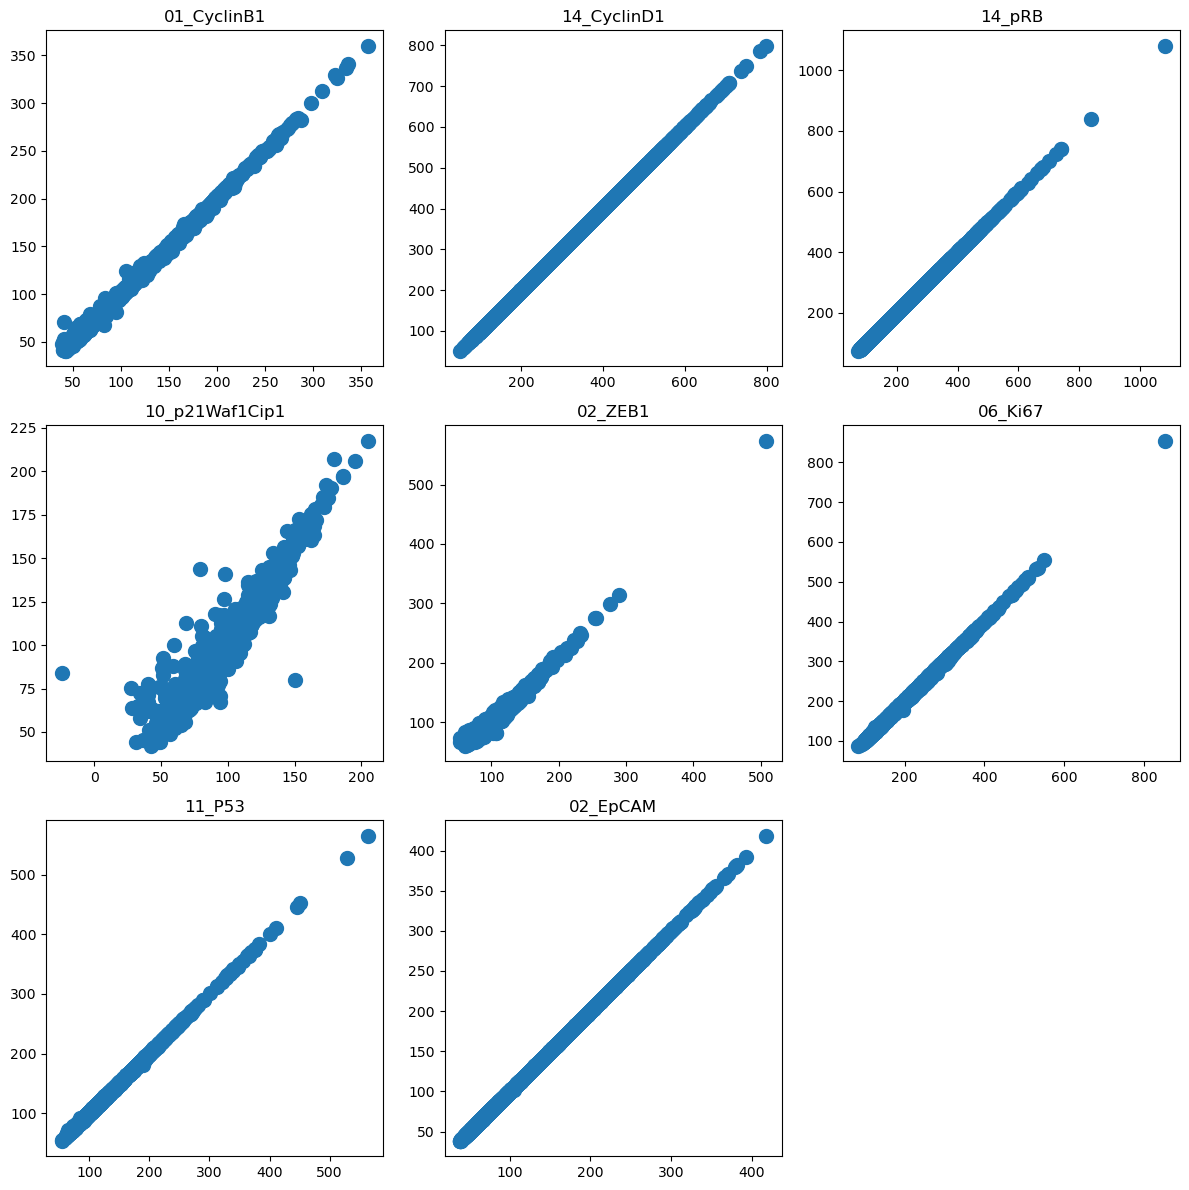

In [ ]:
example_true = adata[:, example_gene_mask].X.toarray()
example_decoded = X_pca_dec_back[:, example_gene_mask]

n_genes = example_decoded.shape[1]
n_rows = int(np.ceil(np.sqrt(n_genes)))
n_cols = n_rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
axes = axes.flatten()

for i in range(n_genes):
    ax = axes[i]
    ax.scatter(example_decoded[:, i], example_true[:, i], s=100)
    ax.set_title(example_gene[i].split("_Cycle")[-1])
    
# Hide empty subplots
for i in range(n_genes, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


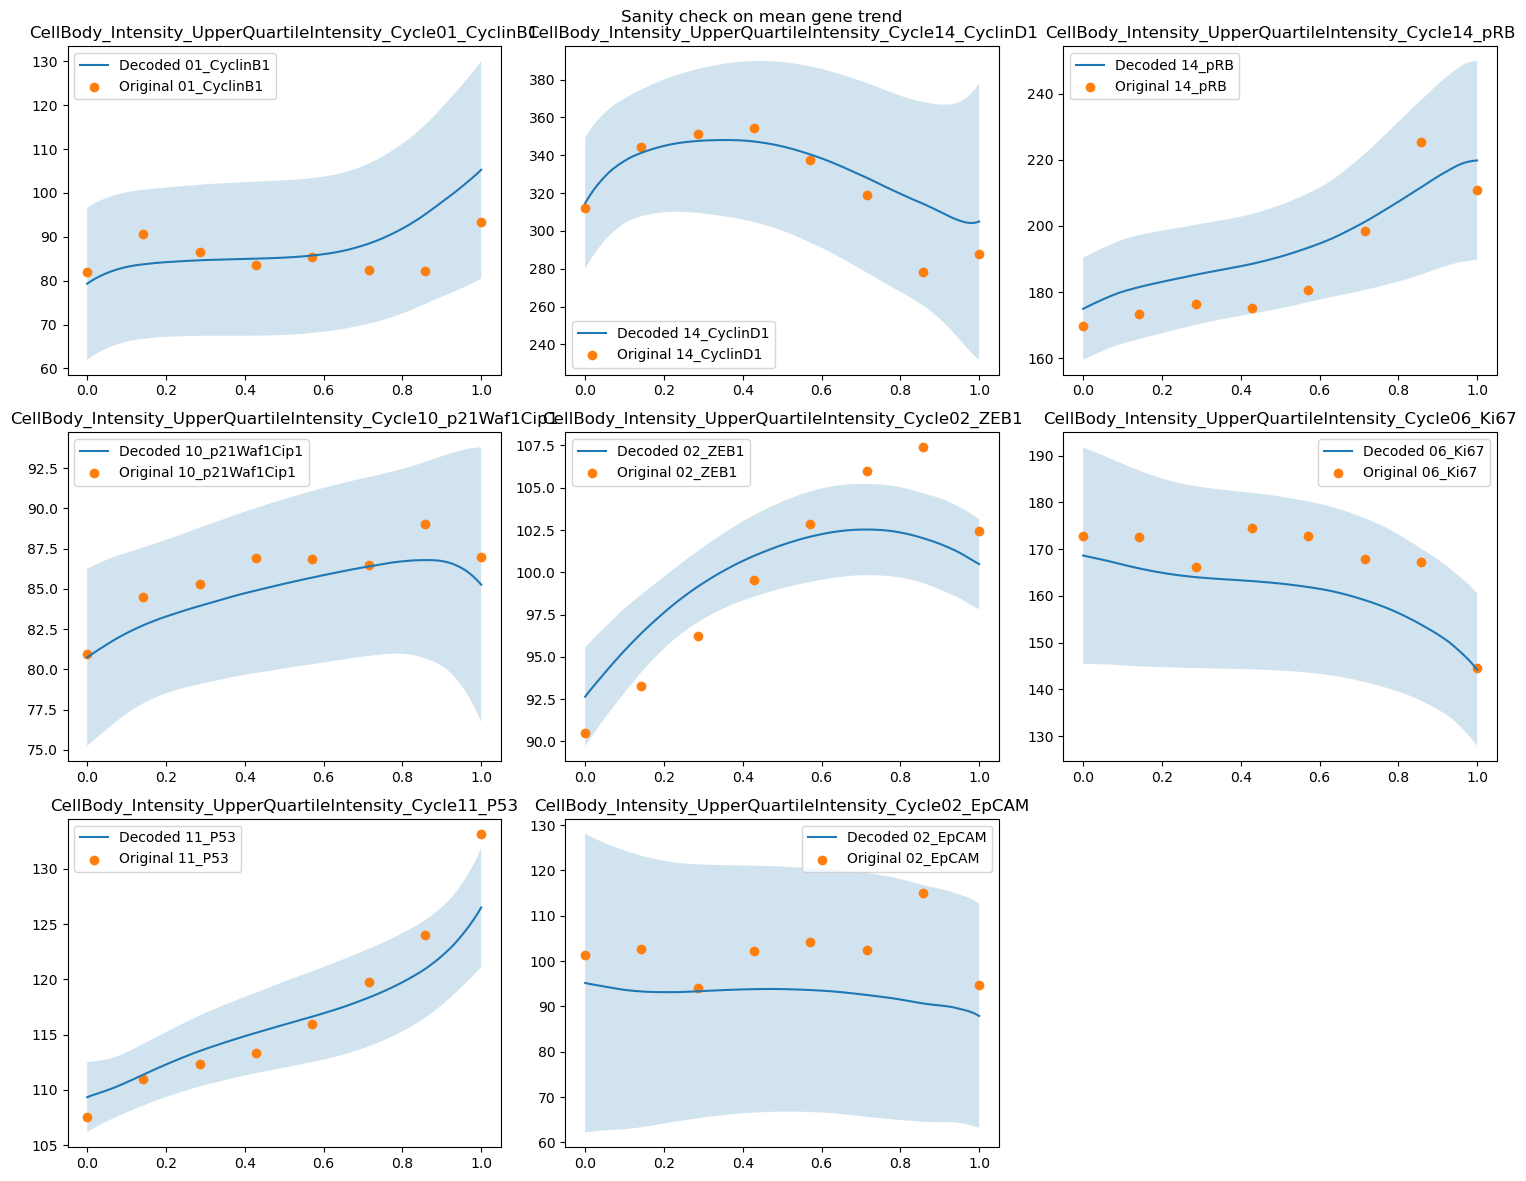

In [ ]:
adata_example_gene = adata[:, example_gene_mask]
decoded_example_gene = traj_gene_sp[:, :, example_gene_mask]
decoded_example_gene_mean = decoded_example_gene.mean(axis=1)
decoded_example_gene_std = decoded_example_gene.std(axis=1)
x_time = np.linspace(0, 1, traj.shape[1])
x_time_data = adata_example_gene.obs['dpt_bin']
x_time_data = (x_time_data - x_time_data.min()) / (x_time_data.max() - x_time_data.min())

# data_df = pd.DataFrame(adata_example_gene.X.toarray(), columns=example_gene, index=adata_example_gene.obs_names)
data_df = pd.DataFrame(X_pca_dec_back[:, example_gene_mask], columns=example_gene, index=adata_example_gene.obs_names)
data_df['x_time'] = x_time_data

data_mean = data_df.groupby('x_time').mean()
data_std = data_df.groupby('x_time').std()

n_genes = decoded_example_gene_mean.shape[1]
n_rows = int(np.ceil(np.sqrt(n_genes)))
n_cols = int(np.ceil(n_genes / n_rows))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i in range(n_genes):
    ax = axes[i]
    ax.plot(x_time, decoded_example_gene_mean[:,i], label=f'Decoded {example_gene[i].split("_Cycle")[-1]}')
    ax.fill_between(x_time, decoded_example_gene_mean[:,i] - decoded_example_gene_std[:,i], decoded_example_gene_mean[:,i] + decoded_example_gene_std[:,i], alpha=0.2)
    ax.scatter(data_mean.index, data_mean[example_gene[i]], label=f'Original {example_gene[i].split("_Cycle")[-1]}')
    # ax.fill_between(data_mean.index, data_mean[example_gene[i]] - data_std[example_gene[i]], data_mean[example_gene[i]] + data_std[example_gene[i]], alpha=0.2)
    ax.legend()
    ax.set_title(example_gene[i])
    
# Hide empty subplots
for i in range(n_genes, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
# Add suptitle with padding
plt.subplots_adjust(top=0.95)  # Leave space at top
plt.suptitle('Sanity check on mean gene trend', y=0.98)  # Position suptitle in the space

plt.show()

In [ ]:
import magic

In [ ]:
magic_op = magic.MAGIC(random_state=42, n_jobs=-1)
magic_op.fit(adata.obsm['X_pca'])
X_magic = magic_op.transform(adata[:, example_gene_mask].X)

Running MAGIC on 19400 cells and 50 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 20.01 seconds.
  Calculating affinities...
  Calculated affinities in 19.84 seconds.
Calculated graph and diffusion operator in 39.88 seconds.
Calculating imputation...
Calculated imputation in 0.02 seconds.


/home/jcr222/.local/lib/python3.9/site-packages/magic/magic.py:541: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  warnings.warn(


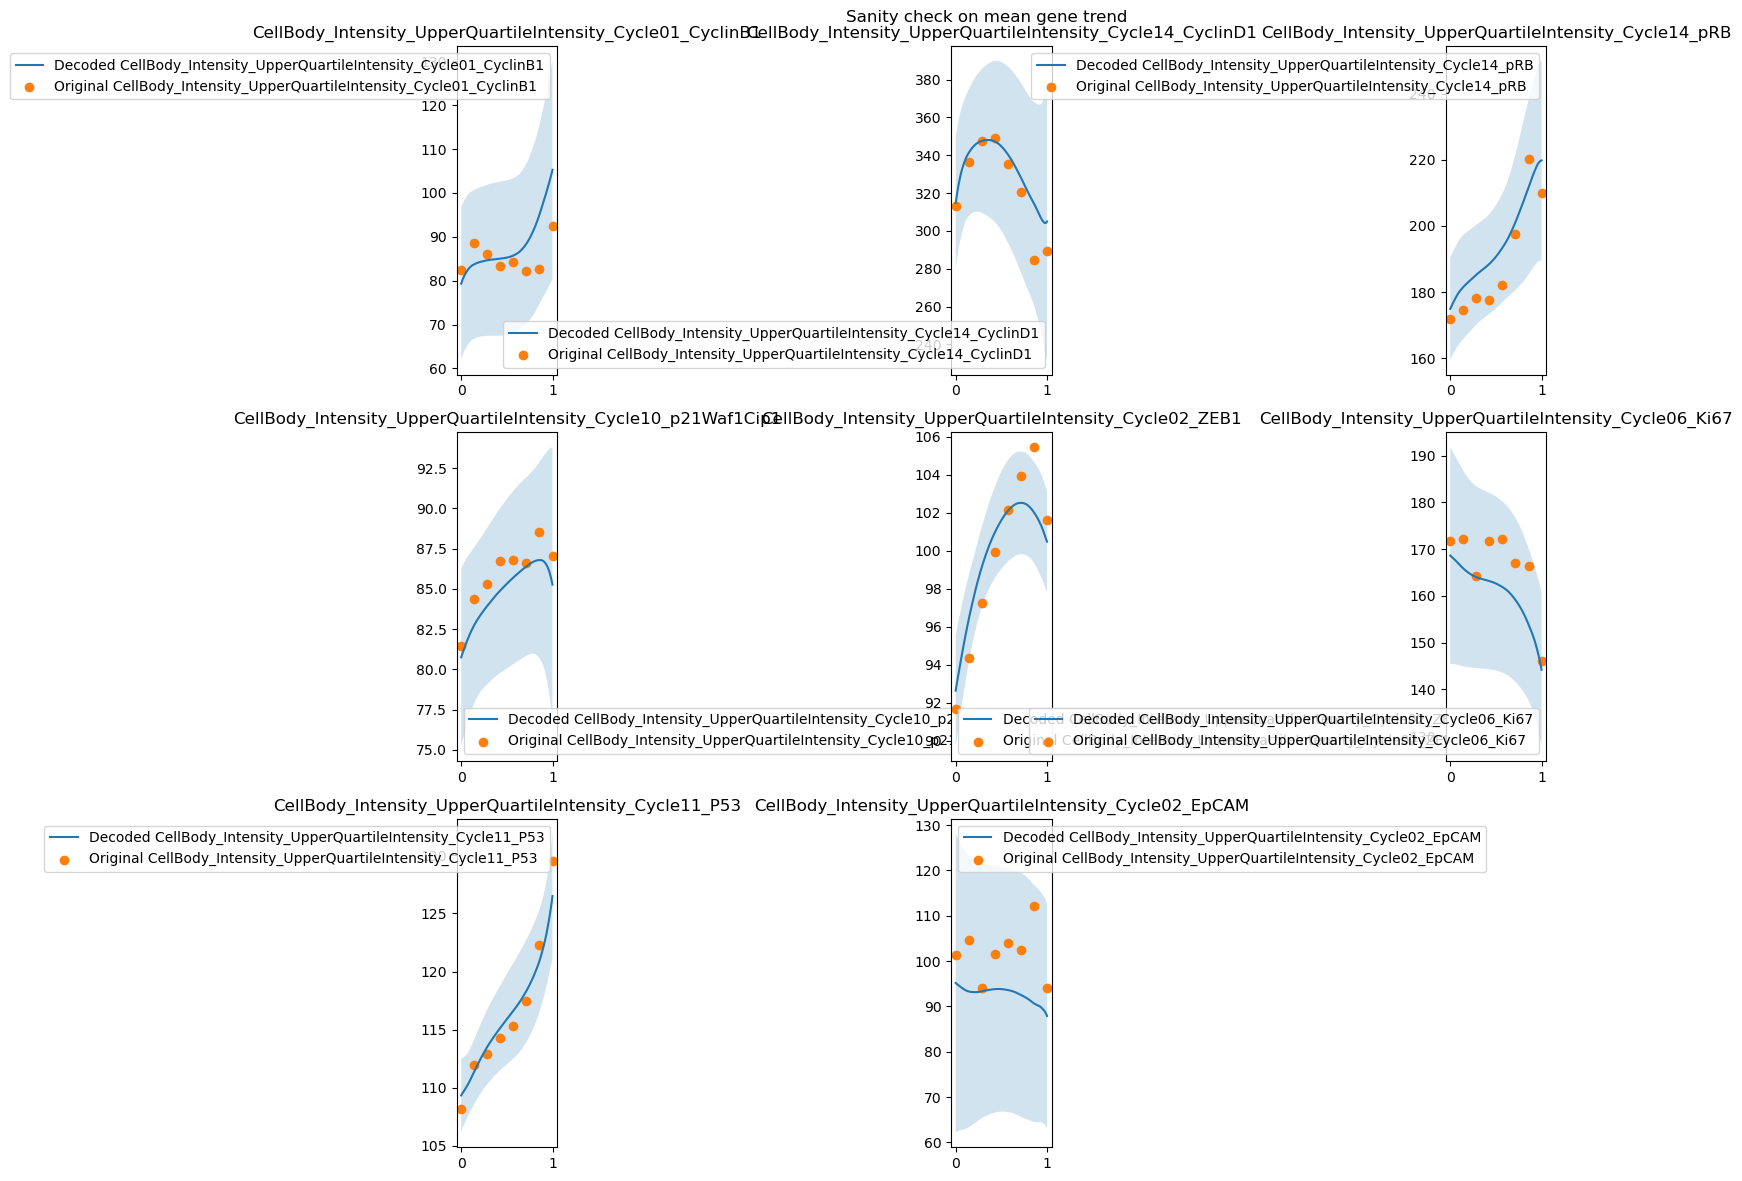

In [ ]:
adata_example_gene = adata[:, example_gene_mask]
decoded_example_gene = traj_gene_sp[:, :, example_gene_mask]
decoded_example_gene_mean = decoded_example_gene.mean(axis=1)
decoded_example_gene_std = decoded_example_gene.std(axis=1)
x_time = np.linspace(0, 1, traj.shape[1])
x_time_data = adata_example_gene.obs['dpt_bin']
x_time_data = (x_time_data - x_time_data.min()) / (x_time_data.max() - x_time_data.min())

data_df = pd.DataFrame(X_magic, columns=example_gene, index=adata_example_gene.obs_names)
data_df['x_time'] = x_time_data

data_mean = data_df.groupby('x_time').mean()
data_std = data_df.groupby('x_time').std()

n_genes = decoded_example_gene_mean.shape[1]
n_rows = int(np.ceil(np.sqrt(n_genes)))
n_cols = int(np.ceil(n_genes / n_rows))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i in range(n_genes):
    ax = axes[i]
    ax.plot(x_time, decoded_example_gene_mean[:,i], label=f'Decoded {example_gene[i]}')
    ax.fill_between(x_time, decoded_example_gene_mean[:,i] - decoded_example_gene_std[:,i], decoded_example_gene_mean[:,i] + decoded_example_gene_std[:,i], alpha=0.2)
    ax.scatter(data_mean.index, data_mean[example_gene[i]], label=f'Original {example_gene[i]}')
    # ax.fill_between(data_mean.index, data_mean[example_gene[i]] - data_std[example_gene[i]], data_mean[example_gene[i]] + data_std[example_gene[i]], alpha=0.2)
    ax.legend()
    ax.set_title(example_gene[i])
    
# Hide empty subplots
for i in range(n_genes, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
# Add suptitle with padding
plt.subplots_adjust(top=0.95)  # Leave space at top
plt.suptitle('Sanity check on mean gene trend', y=0.98)  # Position suptitle in the space

plt.show()

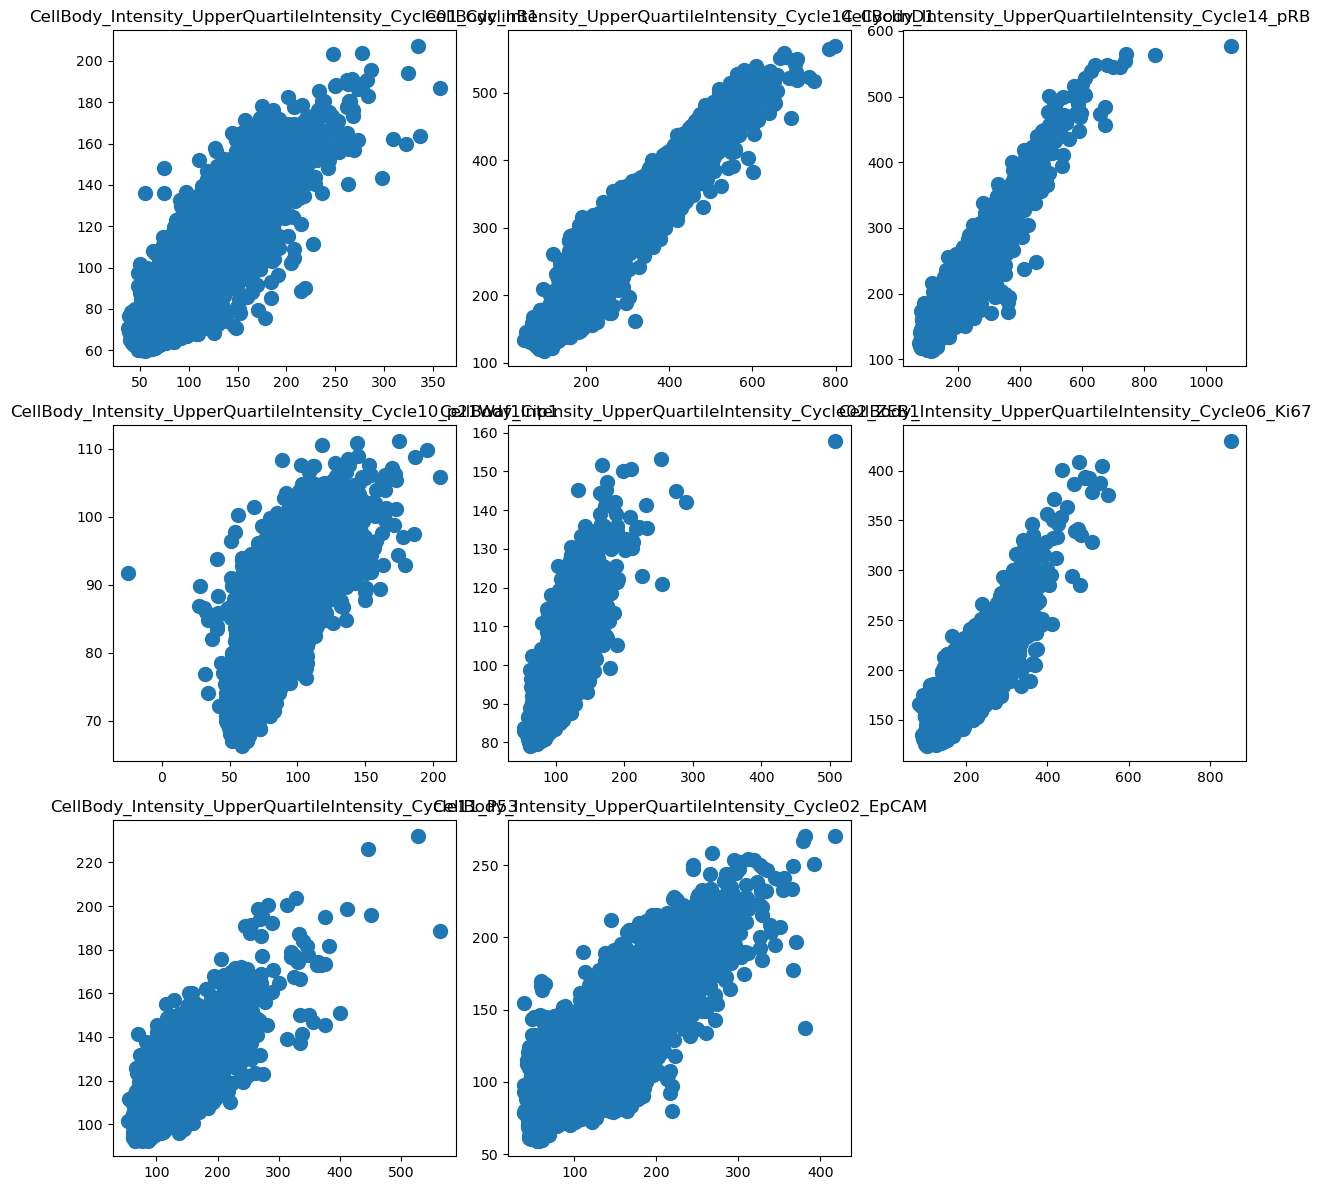

In [ ]:
# example_true = adata[:, example_gene_mask].X.toarray()
example_true = X_magic
example_decoded = X_pca_dec_back[:, example_gene_mask]

n_genes = example_decoded.shape[1]
n_rows = int(np.ceil(np.sqrt(n_genes)))
n_cols = n_rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
axes = axes.flatten()

for i in range(n_genes):
    ax = axes[i]
    ax.scatter(example_decoded[:, i], example_true[:, i], s=100)
    ax.set_title(example_gene[i])
    
# Hide empty subplots
for i in range(n_genes, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()
